Técnica estadística utilizada para explorar las relaciones entre dos conjuntos de variables. CCA se aplica cuando tenés dos conjuntos de variables, uno de variables respuesta (o dependientes) y otro de variables predictoras (o independientes).

### Componentes Clave

El objetivo principal de CCA es encontrar combinaciones lineales de las variables en cada conjunto de modo que la correlación entre estas combinaciones sea máxima.

Se utiliza como complemento a los modelos de regresión u otras técnicas predictivas. Mientras que los modelos de regresión se centran en predecir una variable de respuesta a partir de un conjunto de predictores, CCA busca entender cómo se relacionan dos conjuntos de variables de manera global.

CCA proporciona coeficientes (llamados coeficientes de correlación canónica) que indican la fuerza y dirección de las relaciones entre los dos conjuntos de variables. Estos coeficientes ayudan a entender qué variables de un conjunto están asociadas con qué variables del otro conjunto.

### Armado del dataset.

In [29]:
# Carga de librerías.

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el dataset con las variables respuesta en cada columna propia. 

Ejemplo:

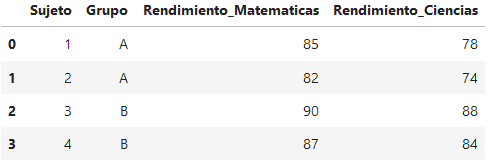

Las variables respuesta son Rendimiento_Matematicas y Rendimiento_Ciencias.

In [30]:
# Carga del dataset.

%run "Base 2 - 1. Dataset para modelos.ipynb"

En este programa se hace esto: pasar las variables respuesta a un formato largo.


#### Acomodar dataset (por ahora es manual). 
Si tenemos dos variables respuesta, que son, por ejemplo, V1 y V2, se crea una columna nueva que se llama "Variables", y en este columna va a indicar si es V1 o V2. En otra columna, "Valor", va a ir el valor correspondiente de cada variable.


Algo así:

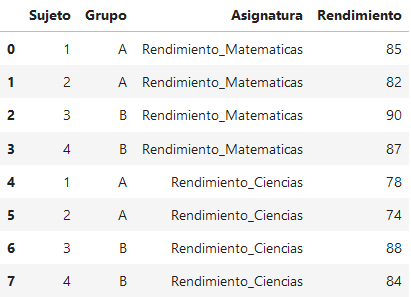

En este ejemplo, las variables respuesta son Rendimiento_Matemática y Rendimiento_Ciencias. Se pone en la columna "Asignatura" a cuál variable corresponde, y en "Rendimiento" se pone el valor original.

### Armamos el modelo.

Definimos los efectos aleatorios, que son los que capturan la variabilidad específica de cada grupo o nivel de una variable categórica. En el caso del ejemplo, Sujeto es el grupo para los efectos aleatorios, lo que significa que esperamos que haya variabilidad en el rendimiento que sea específica de cada sujeto.

Los efectos fijos son los efectos que estamos interesados en estimar, como las diferencias entre grupos o asignaturas.

#### Definición de Variables Respuesta y Variables Explicatorias.

In [31]:
# Está en el programa anterior: 1. Dataset para modelos.ipynb
# Si lo querés editar, editalo ahí.

#### Chequeos.

1) Valores no nulos.

In [32]:
# Valores nulos en variables explicatorias.
Nulos = df_Largo[Variables_Explicatorias].isnull().sum()

# Filtrar las columnas que tienen valores nulos.
Columnas_Con_Nulos = Nulos[Nulos > 0].index

# Ajustar las opciones de pandas para mostrar más filas y columnas
pd.set_option('display.max_rows', None)  # Muestra todas las filas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas

if len(Columnas_Con_Nulos) > 0:
    print("Valores nulos por columna:")
    print(Nulos[Columnas_Con_Nulos])

2) Valores no numéricos.

In [33]:
# Valores no numéricos en cada columna.
for i in Variables_Explicatorias:
    if not pd.api.types.is_numeric_dtype(df_Largo[i]):
        print(f"La columna {i} no es numérica.")

3. Por las dudas, cambiar a categóricas.

In [34]:
# Convertir todas las variables explicatorias a numéricas.
for i in Variables_Explicatorias:
    df_Largo[i] = pd.to_numeric(df_Largo[i], errors='coerce')

4. Chequear que todas las columnas tengan la misma cantidad de filas.

In [35]:
for i in df_Largo.columns:
    Numero_Filas_Columna = df_Largo[i].shape[0]
    if Numero_Filas_Columna != df_Largo.shape[0]:
        print(f"La columna {i} tiene {Numero_Filas_Columna} filas, diferente de {df_Largo.shape[0]} filas del DataFrame.")

5. Eliminación de columnas del df que pesan poco. Esto se hace a mano.

6. Abajo, se redefinen las VR y VEs.

In [36]:
# Eliminamos algunas columnas del df.

Columnas_Eliminadas = [
    "e_social_Alto",
    "e_social_Bajo",
    "niv_educativo_Posgrado",
    "niv_educativo_Primario",
    "niv_educativo_Terciario",
    "inmueble_res_Cedido",
    "inmueble_res_Propio",
    "voto_2019_DelCaño",
    "candidato_PASO_2023_Bregman",
    "candidato_PASO_2023_Bullrich",
    "candidato_PASO_2023_Grabois",
    "candidato_PASO_2023_Larreta",
    "candidato_PASO_2023_Milei",
    "candidato_PASO_2023_Reservado",
    "candidato_PASO_2023_Schiaretti",
    "edad",
    "milei_ip_conpro",
    "milei_ip_rt",
    "bullrich_ip_izqder",
    "bullrich_ip_conpro",
    "schiaretti_ip_izqder",
    "schiaretti_ip_conpro",
    "schiaretti_ip_rt",
    "e_social_MedioAlto",
    "e_social_MedioBajo",
    "voto_2019_Fernandez",
    "voto_2019_Macri",
    'indice_positividad',
    'indice_progresismo_tiempo',
    'indice_conservadurismo_tiempo',
     'massa_ip_izqder',
     'massa_ip_conpro',
     'massa_ip_rt',
     'milei_ip_izqder',
     'bregman_ip_izqder',
     'bregman_ip_conpro',
     'bregman_ip_rt',
     'bullrich_ip_rt',
     'genero_Otro',
     'provincia_BsAs',
     'provincia_CABA',
     'provincia_Chaco',
     'provincia_Chubut',
     'provincia_Cordoba',
     'provincia_EntreRios',
     'provincia_Mendoza',
     'provincia_Neuquen',
     'provincia_Otro',
     'provincia_RioNegro',
     'provincia_SanLuis',
     'provincia_SantaFe',
     'provincia_Tucuman',
     'e_social_Medio',
     'niv_educativo_Secundario',
     'niv_educativo_Universitario',
     'f_ingreso_Beca',
     'f_ingreso_EmpresaPropia',
     'f_ingreso_Familia',
     'f_ingreso_Otro',
     'f_ingreso_Renta',
     'f_ingreso_Trabajo',
     'inmueble_res_Alquilo',
     'inmueble_res_Otro',
     'inmueble_res_Prestado',
     'voto_2019_Blanco',
     'voto_2019_Espert',
     'voto_2019_GomezCenturion',
     'voto_2019_Lavagna',
     'voto_2019_NoVoto',
     'voto_2019_Reservado',
     'voto_PASO_2023_No',
     'voto_PASO_2023_Otro',
     'voto_PASO_2023_Si',
     'candidato_PASO_2023_Blanco',
     'candidato_PASO_2023_Inaplicable',
     'candidato_PASO_2023_Massa',
     'candidato_PASO_2023_Moreno',
     'candidato_PASO_2023_Otro',
     'votara_2023_Ignora',
     'votara_2023_No',
     'votara_2023_Si',
     'afiliacion_pol_No',
     'afiliacion_pol_Si',
     'cambio_op_con_tiempo',
     'cambio_op_pro_tiempo',
#     'indice_progresismo',
#      'indice_conservadurismo',
      'genero_Femenino',
      'genero_Masculino',
      'autopercep_conpro',
'autopercep_izqder',
'autopercep_perantiper',
'cercania_Massa',
'cercania_Milei',
'cercania_Bregman',
'cercania_Bullrich',
'cercania_Schiaretti']

# Eliminar las columnas.
df_Largo = df_Largo.drop(columns=Columnas_Eliminadas)

In [37]:
# Grupos de variables.
Variables_Respuesta = ['cambio_op_pro', 'cambio_op_con']
Variables_Explicatorias = [i for i in df_Largo.columns if i not in ['id', 'const'] + Variables_Respuesta + Cambio_Opinion]

#### Modelo.

In [38]:
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [39]:
# Inicializar el modelo de CCA.
Modelo_CCA = CCA(n_components=2)  # Se puede ajustar el número de componentes según las necesidades

# Convertir las listas con los nombres de las columnas en dfs para seleccionar las columnas correspondientes.
df_VE = df_Largo[Variables_Explicatorias]
df_VR = df_Largo[Variables_Respuesta]

scaler = StandardScaler()

# Transformar dfs.
df_VE = scaler.fit_transform(df_VE)
df_VR = scaler.fit_transform(df_VR) 

# Ajustar modelo.
Modelo_CCA.fit(df_VE, df_VR)

# Obtener las componentes canónicas.
VE_CC, VR_CC = Modelo_CCA.transform(df_VE, df_VR)

In [40]:
# En caso de 1 componente.

# Ver la correlación del componente canónico.
# Correlacion_Canonica = np.corrcoef(VE_CC[:, 0], VR_CC[:, 0])[1][0]

# Visualizar la correlación
# plt.bar(['CC1'], [Correlacion_Canonica], color='lightgrey', width=0.5, edgecolor='k')
# plt.title('Correlación entre componentes canónicos')
# plt.ylabel('Correlación')
# plt.show()

<BarContainer object of 2 artists>

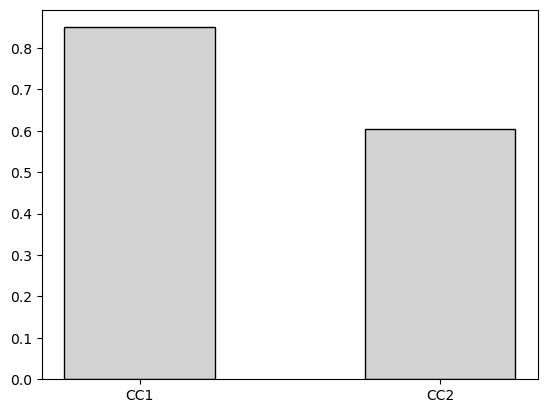

In [41]:
# En caso de 2 componentes. 

# Ver correlación de los dos pares canónicos.
Correlación_Pares_Canónicos = [np.corrcoef(VE_CC[:, i], VR_CC[:, i])[1][0] for i in range(2)]
plt.bar(['CC1', 'CC2'], Correlación_Pares_Canónicos, color='lightgrey', width = 0.5, edgecolor='k')

Let’s see now which variables from both datasets influence their canonical variates the most. We do that by analyzing the loadings associated with each of our canonical variates.

In [42]:
Variables_Pesadas = []
Componente1 = []
Componente2 = []

# Iterar sobre las cargas de las variables explicativas
for i in range(0, len(Modelo_CCA.x_loadings_)):
    # Obtener las cargas de la variable explicativa i
    loadings_i = Modelo_CCA.x_loadings_[i]
    
    # Verificar si alguna de las cargas absolutas es mayor que 0.1
    if np.any(np.abs(loadings_i) > 0.00001):
        # Imprimir el nombre de la variable explicativa y su carga correspondiente
        print(f"Variable explicativa: {Variables_Explicatorias[i]}")
        print(f"Carga: {loadings_i}")

Variable explicativa: indice_progresismo
Carga: [0.82341598 0.34244561]
Variable explicativa: indice_conservadurismo
Carga: [-0.66103835  0.93953765]


## p-valores.

In [44]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Obtener las componentes canónicas
correlaciones = {}
p_valores = {}

# Calcular correlaciones entre cada VE y cada VR
for i, var_exp in enumerate(Variables_Explicatorias):
    for j, var_resp in enumerate(Variables_Respuesta):
        corr, p_val = pearsonr(df_VE[:, i], df_VR[:, j])
        correlaciones[(var_exp, var_resp)] = corr
        p_valores[(var_exp, var_resp)] = p_val

# Convertir a DataFrames para una mejor visualización
df_correlaciones = pd.DataFrame(correlaciones, index=['Correlación'])
df_p_valores = pd.DataFrame(p_valores, index=['p-valor'])

print("Correlaciones:")
print(df_correlaciones)

print("\nP-valores:")
print(df_p_valores)

Correlaciones:
            indice_progresismo               indice_conservadurismo  \
                 cambio_op_pro cambio_op_con          cambio_op_pro   
Correlación           0.835624     -0.465635              -0.547301   

                           
            cambio_op_con  
Correlación      0.729064  

P-valores:
        indice_progresismo                indice_conservadurismo              
             cambio_op_pro  cambio_op_con          cambio_op_pro cambio_op_con
p-valor                0.0  1.564944e-149          6.839013e-217           0.0


### Supuestos.

1. Linealidad

Usando gráficos de dispersión para verificar la linealidad entre variables. 
Para verificar la linealidad entre conjuntos de variables, se puede usar matrices de dispersión.

In [45]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator, FormatStrFormatter
import scipy.stats as stats
from scipy.stats import linregress

def Grafico (X, Y, df):
    # Crear el gráfico
    plt.figure(figsize=(8, 6))
    
    
    # Regresión lineal.
    # Calcular el R: coeficiente de correlación.
    R = df[[X, Y]].corr().iloc[0,1]
    
    # Calcular regresión lineal.
    slope, intercept, r_value, p_value, std_err = linregress(df[X], df[Y])
    
    # Gráfico de la regresión lineal (la línea de tendencia).
    plt.plot(df[X], 
             intercept + slope * (df[X]),                 
             color='red',                                
             label=f'R: {R:.2f}')
    
    
    # Puntos y tamaños.
    # Obtener el número de ocurrencias de cada combinación de valores (x, y).
    df_Agrupado = df.groupby([X, Y]).size().reset_index(name='Ocurrencias')
    
    # Gráfico de dispersión con bolas de tamaño ajustado por cantidad de datos.
    plt.scatter(df_Agrupado[X], df_Agrupado[Y], s=df_Agrupado['Ocurrencias'] * 30, color='green', alpha=0.5)
    
    
    # Leyendas.
    # Etiquetas de los ejes.
    plt.xlabel(X, labelpad = 15)
    plt.ylabel(Y, labelpad = 15)
    
    # Agregar texto para las leyendas 'Min' y 'Max'
    
    #Leyendas del eje x.
    # plt.text(min_x, 
    #         posicion_y, 
    #         f'{leyenda_x_bajo}', 
    #         ha='center', va='top', 
    #         color='gray')
    
    #plt.text(max_x, 
    #         posicion_y, 
    #         f'{leyenda_x_alto}', 
    #         ha='center', va='top', 
    #         color='gray')
    
    #Leyendas del eje y.
    #plt.text(posicion_x, 
    #         min_y, f'{leyenda_y_bajo}', 
    #         ha='right', va='center', 
    #         color='gray', 
    #         rotation='vertical')
    
    #plt.text(posicion_x, 
    #         max_y, f'{leyenda_y_alto}', 
    #         ha='right', va='center', 
    #         color='gray', 
    #         rotation='vertical')
    
    
    # Título.
    # plt.title(f'{X} vs. {Y}', pad=15)
    
    # Leyenda
    plt.legend()
    
    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

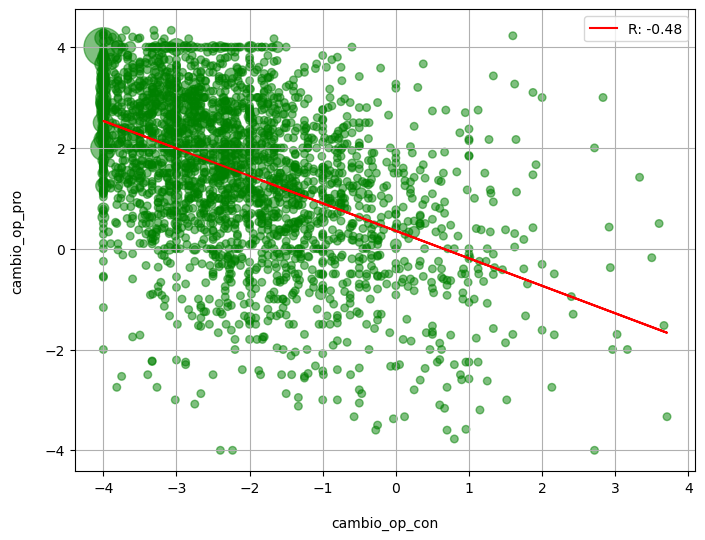

In [46]:
Grafico ('cambio_op_con', 'cambio_op_pro', df_Largo)

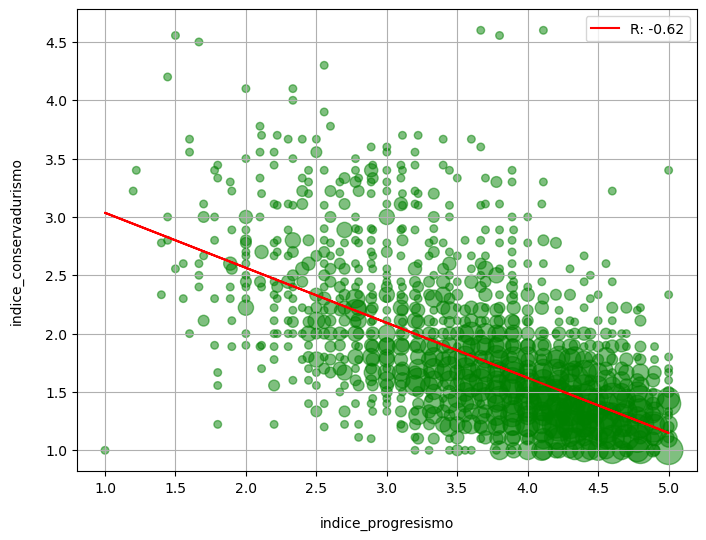

In [47]:
Grafico ('indice_progresismo', 'indice_conservadurismo', df_Largo)

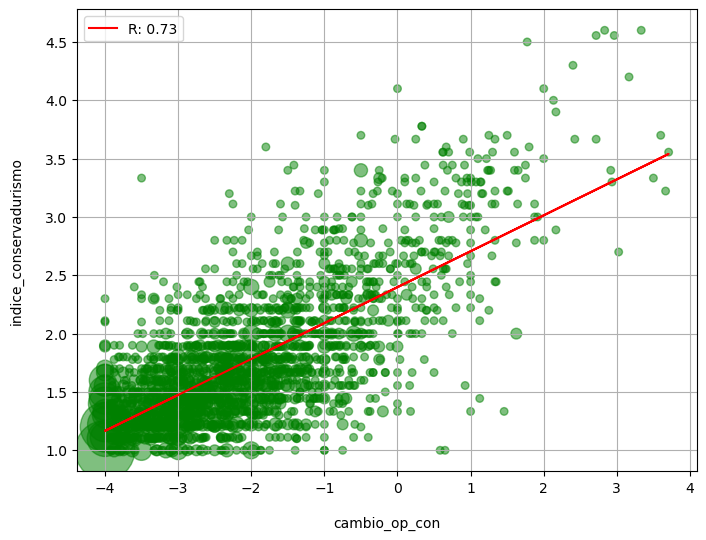

In [48]:
Grafico ('cambio_op_con', 'indice_conservadurismo', df_Largo)

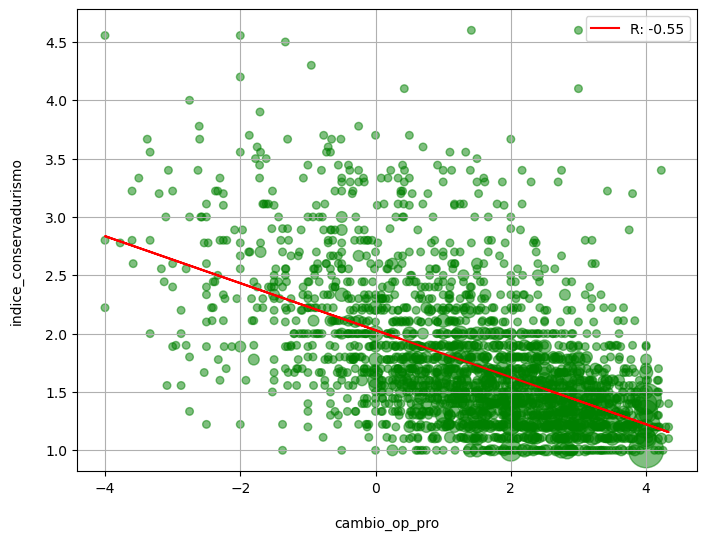

In [49]:
Grafico ('cambio_op_pro', 'indice_conservadurismo', df_Largo)

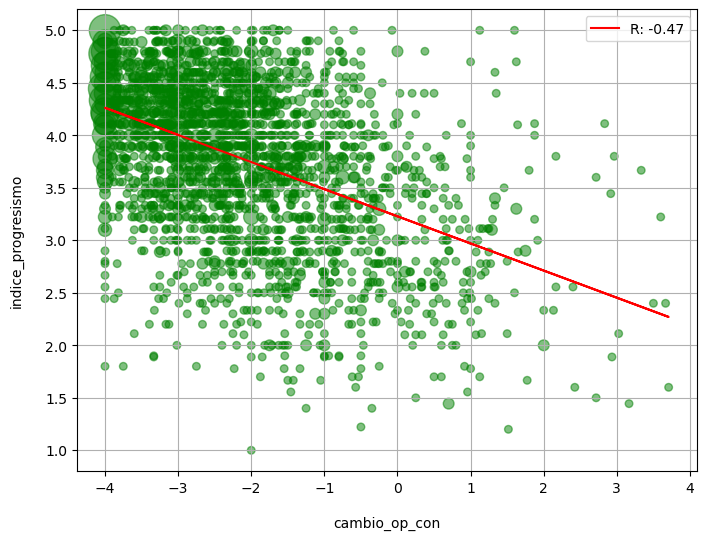

In [50]:
Grafico ('cambio_op_con', 'indice_progresismo', df_Largo)

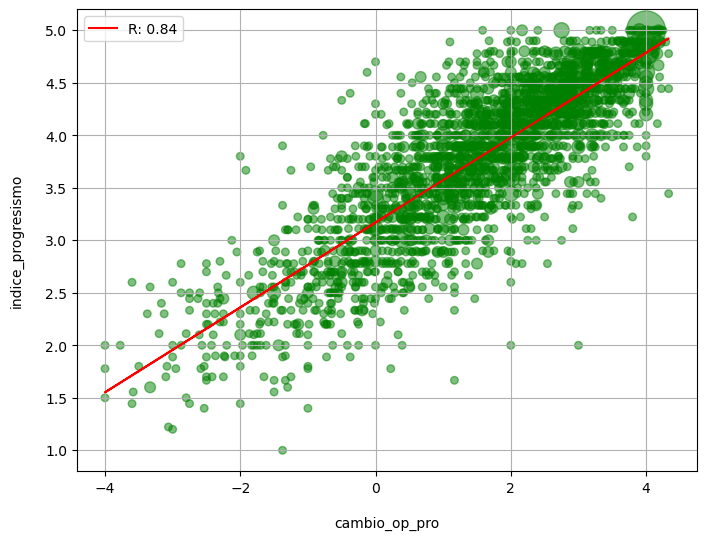

In [51]:
Grafico ('cambio_op_pro', 'indice_progresismo', df_Largo)

2. Normalidad multivariante

Los datos deben seguir una distribución normal multivariante.
Se usa tests de normalidad multivariante como el test de Mardia. También se puede usar gráficos Q-Q para evaluar la normalidad univariada.

Normalidad para VE:                                W          pval  normal
indice_conservadurismo  0.881477  8.234030e-42   False
indice_progresismo      0.957036  6.828138e-28   False
Normalidad para VR:                       W          pval  normal
cambio_op_con  0.936234  5.863465e-33   False
cambio_op_pro  0.968546  3.318528e-24   False


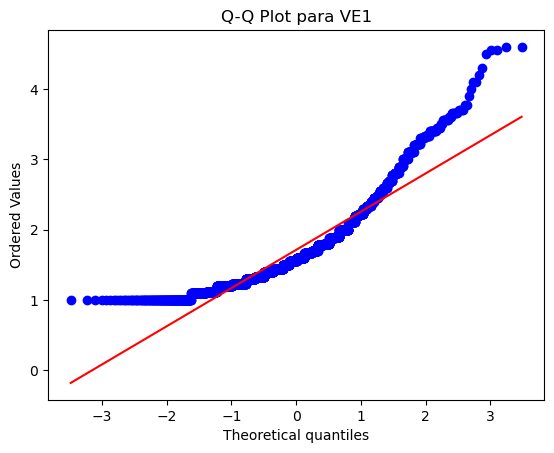

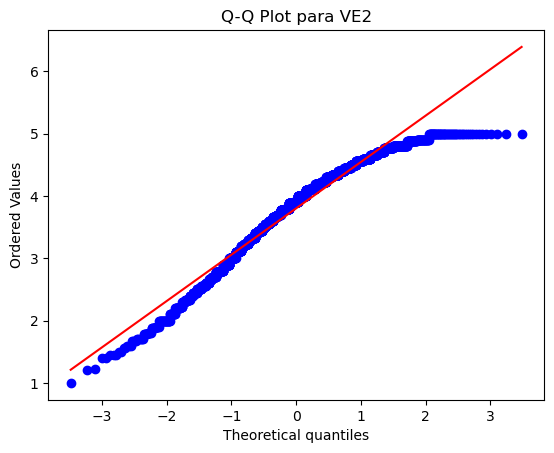

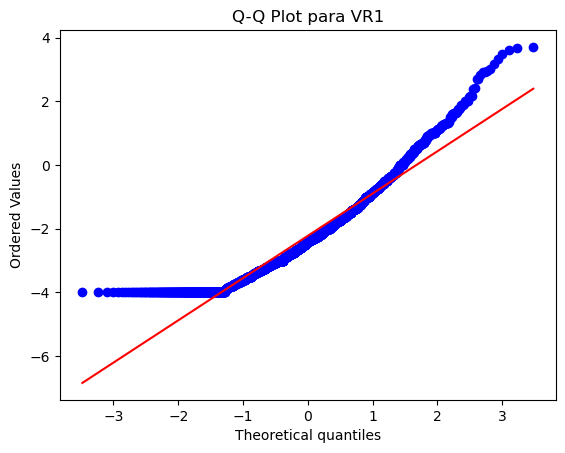

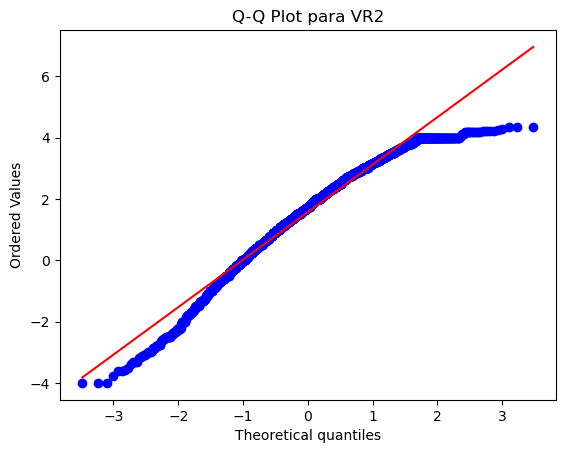

In [52]:
import pingouin as pg

# Verificar normalidad multivariante.
result_ve = pg.normality(df[['indice_conservadurismo', 'indice_progresismo']])
result_vr = pg.normality(df[['cambio_op_con', 'cambio_op_pro']])
print("Normalidad para VE:", result_ve)
print("Normalidad para VR:", result_vr)

# Gráficos Q-Q para normalidad univariada.
from scipy import stats

def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

qq_plot(df['indice_conservadurismo'], 'Q-Q Plot para VE1')
qq_plot(df['indice_progresismo'], 'Q-Q Plot para VE2')
qq_plot(df['cambio_op_con'], 'Q-Q Plot para VR1')
qq_plot(df['cambio_op_pro'], 'Q-Q Plot para VR2')

3. Homocedasticidad

La varianza de los errores debe ser constante a lo largo de todas las observaciones. Revisa los gráficos de dispersión de residuos y sus varianzas.

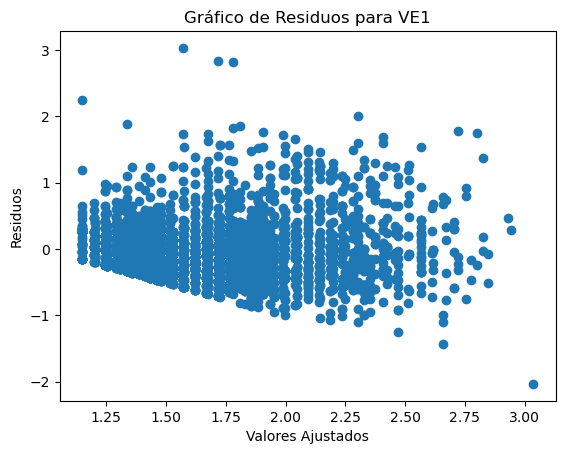

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Ajustar un modelo para verificar homocedasticidad
model = smf.ols('indice_conservadurismo ~ indice_progresismo', data=df_Largo).fit()
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos para VE1')
plt.show()

La prueba de White también evalúa la heterocedasticidad y es robusta.
La hipótesis nula es que no hay heterocedasticidad. Un p-valor bajo (por debajo de un umbral, como 0.05) sugiere que hay evidencia de heterocedasticidad.

In [54]:
from statsmodels.stats.diagnostic import het_white

# Realizar la prueba de White
white_test = het_white(residuals, model.model.exog)

# Resultados de la prueba
labels = ['LM estatístico', 'p-valor LM', 'F estadístico', 'p-valor F']
white_results = dict(zip(labels, white_test))
print(white_results)

{'LM estatístico': 127.64783956854154, 'p-valor LM': 1.9125985591035578e-28, 'F estadístico': 66.8256015353517, 'p-valor F': 4.5210321482299283e-29}


4. Colinealidad.
   
El Factor de Inflación de la Varianza (VIF) se puede calcular. Si da más alto de 5, hay colinealidad alta, y más de 10 es muchísima.

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF para variables en VE
X_ve = df[['indice_conservadurismo', 'indice_progresismo']]
vif_ve = pd.DataFrame()
vif_ve['Variable'] = X_ve.columns
vif_ve['VIF'] = [variance_inflation_factor(X_ve.values, i) for i in range(X_ve.shape[1])]
print("VIF para VE:\n", vif_ve)

# VIF para variables en VR
X_vr = df[['cambio_op_con', 'cambio_op_pro']]
vif_vr = pd.DataFrame()
vif_vr['Variable'] = X_vr.columns
vif_vr['VIF'] = [variance_inflation_factor(X_vr.values, i) for i in range(X_vr.shape[1])]
print("VIF para VR:\n", vif_vr)

VIF para VE:
                  Variable       VIF
0  indice_conservadurismo  4.822757
1      indice_progresismo  4.822757
VIF para VR:
         Variable       VIF
0  cambio_op_con  2.530214
1  cambio_op_pro  2.530214


Resumen de supuestos.
1. Hay linealidad moderada y alta entre variables.
2. Los datos no siguen una distribución normal.
3. Hay evidencia de homocedasticidad.
4. No hay colinealidad entre las variables.

El único problema es el punto 2. Pueden transformarse los datos para ajustarlos a normalidad. De formas:
- Logarítmica.
- Raíz cuadrada.
- Box-cox.
- Yeo-Johnson.
Luego de esto, habría que verificar nuevamente la normalidad de los datos.

También hay modelos alternativos que pueden llegar a servir, que no asumen normalidad.
- Regresión canónica de permutación.
- Análisis de componentes canónicos (CCA) no paramétrico.
- Análisis de correspondencias canónicas.